<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Classification Metrics I

_Authors: Matt Brems (DC), Riley Dallas (AUS)_

---

## Importing libraries
---

We'll need the following libraries for today's lecture:
1. `pandas`
4. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
5. The `load_breast_cancer` function from `sklearn`'s `datasets` module
6. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
7. `StandardScaler` from `sklearn`'s `preprocessing` module
8. `sklearn`'s `metrics` module

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

## Create dataset
---

Similar to `load_iris`, we'll call the `load_breast_cancer()` function to create our dataset.

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## Create `X` and `y`
---

The dataset labels benign tumors as 1, and malignant tumors as 0. This is contrary to how you typically label data: the more important class (malignant) should be labeled 1.

In [4]:
# Turn 1s into 0s and 0s into 1s
X = cancer.data

y = 1 - cancer.target

In [5]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Train/Test Split
---

In the cell below, train/test split your `X` and `y` variables. 

**Note** we'll want to create a stratified split.

In [6]:
y.mean()

0.37258347978910367

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   random_state = 42,
                                                   stratify = y)

In [8]:
y_train.mean()

0.3732394366197183

In [9]:
y_test.mean()

0.3706293706293706

## Scaling our features
---

Because we're using KNN for our model, we'll want to scale our training and testing sets.

In [10]:
ss = StandardScaler()

# Option A
ss.fit(X_train)
X_train_sc = ss.transform(X_train)

# Option B
X_train_sc = ss.fit_transform(X_train)

# Always the same
X_test_sc = ss.transform(X_test)

## Instantiate and fitting our model
---

In the cells provided, create and fit an instance of `KNeighborsClassifier`. You can use the default parameters.

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

## Predictions
---

Use our newly fitted KNN model to create predictions from `X_test_scaled`.

In [13]:
pred = knn.predict(X_test_sc)

In [14]:
knn.predict_proba(X_test_sc)[:15]

array([[0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6]])

In [15]:
pred[:15]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

## Confusion Matrix
---

We'll create a confusion matrix using the `confusion_matrix` function from `sklearn`'s `metrics` module.

In [16]:
cm = metrics.confusion_matrix(y_test, pred)

cm

array([[89,  1],
       [ 5, 48]])

## Confusion DataFrame
---

The confusion matrix we just created isn't very explanatory, so let's drop it into a pandas `DataFrame`.

In [17]:
cm.ravel()

array([89,  1,  5, 48])

In [18]:
tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

89 1 5 48


In [19]:
df = pd.DataFrame(cm,
                 columns = ['predicted benign', 'predicted malignant'],
                 index = ['actual benign', 'actual malignant'])

df

,predicted benign,predicted malignant
actual benign,89,1
actual malignant,5,48


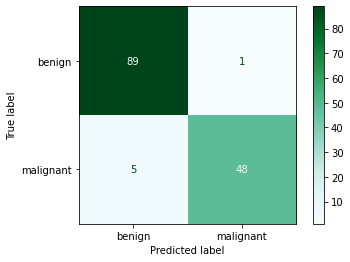

In [21]:
metrics.plot_confusion_matrix(knn, X_test_sc, y_test,
                             display_labels = ['benign', 'malignant'],
                             cmap = 'BuGn');

## Calculate recall
---

<details>
    <summary>Need a hint?</summary>
    Recall = Sensitivity
</details>

In [22]:
# Recall = Sensitivity

# True Positive Rate

tp / (tp + fn)

0.9056603773584906

In [23]:
metrics.recall_score(y_test, pred)

0.9056603773584906

## How many Type I errors are there?
---

<details>
    <summary>Need a hint?</summary>
    Type I = False positive
</details>

In [24]:
fp

1

## How many Type II errors are there?
---
<details>
    <summary>Need a hint?</summary>
    Type II = False negatives
</details>

In [25]:
fn

5

## Which error is worse (Type I vs Type II)?
---

Your answer here.

## Calculate the precision
---


In [26]:
# Precision is the predicted positve rate
tp / (tp + fp)

0.9795918367346939

In [27]:
metrics.precision_score(y_test, pred)

0.9795918367346939

In [28]:
assert metrics.precision_score(y_test, pred) == (tp / (tp + fp))